# Diabetes Machine Learning Binary Classification 

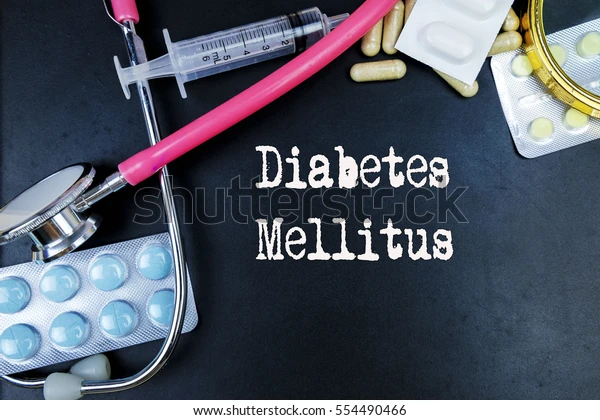

Diabetes mellitus is a chronic disease characterized by hyperglycemia. It may cause many complications. According to the growing morbidity in recent years, in 2040, the world’s diabetic patients will reach 642 million, which means that one of the ten adults in the future is suffering from diabetes. There is no doubt that this alarming figure needs great attention. With the rapid development of machine learning, machine learning has been applied to many aspects of medical health. In this study, we used decision tree, random forest and neural network to predict diabetes mellitus.

# Context

This dataset is orginally from the National Institute of Diabetes and Digestive and Kidney Diseases, Maryland, USA. The objectie of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurement included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females, at least 21 years old and ao fPima Indian heritage.

# Classification  
In this section, we used decision tree, RF and neural network as the classifiers. Decision tree and RF can implement in WEKA, which is a free, non-commercial, open source machine learning and data mining software based on JAVA environment. Neural network can be implemented in MATLAB, which is a commercial mathematics software exploited by MathWorks, Inc. It is used for algorithmic development, data visualization, data analysis and provides advanced computational language, and interactive environment for numerical calculation.

# Importing the Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from numpy import sort
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel,SelectKBest,f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,classification_report,roc_curve,roc_auc_score

# Loading the dataset

In [48]:
data = pd.read_csv("C:\\Users\\SHASHI\\OneDrive\\Desktop\\Python\\diabetes.csv")

In [49]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Dimension of the data

In [50]:
data.shape

(768, 9)

In [51]:
data.info() # To find any missing values with data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


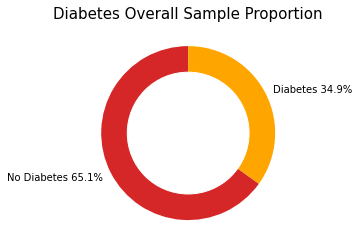

In [52]:
prop = 100*data['Outcome'].value_counts()/len(data)

labels = ['No Diabetes '+ str(round(prop[0],2)) + "%",'Diabetes '+ str(round(prop[1],2)) + "%"]
colormap = {'tab:red','orange'}
data['Outcome'].value_counts().plot.pie(startangle=90, colors=colormap, labels=labels)
plt.title("Diabetes Overall Sample Proportion", fontsize=15)
plt.ylabel('')
circle = plt.Circle((0,0),0.7,color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

Total approximately 35% of the people havethe diabetes from the dataset

In [53]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Lest have a look on Visualization of variables

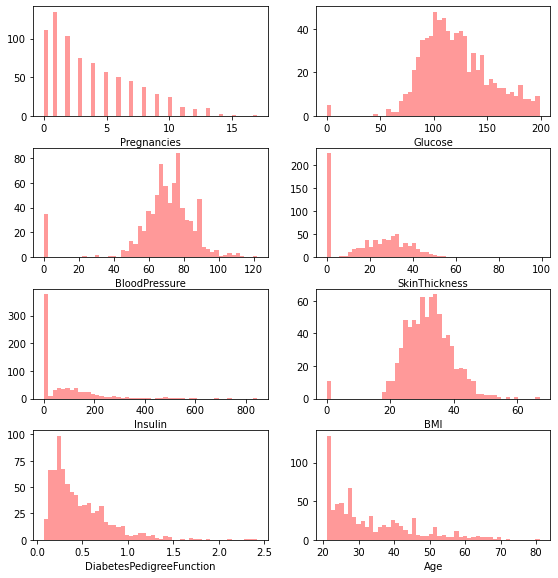

In [54]:
features = data.columns.drop('Outcome')

nrows=4
ncols=2
plt.subplots(nrows,ncols,figsize=(8,8))
plt.tight_layout()

j=1
for i in features:
    plt.subplot(nrows,ncols,j)
    sns.distplot(data[i],bins=50, kde=False, color='red')
    j+=1

With the exception of the number of pregnancies, which is discrete, all other features are continuous numeric values. It is evident that missing values have been coded as 0 in the dataset because zero values in the tests are not possible. There is also a value of 99 in the skin thickness which is likely to be another missing value as the subject's BMI is only average. Before we explore the relationship between outcome and independent variables we will examine the relationship between outcome and missing status.

In [55]:
miss_markers = []

for i in features:
    if i in ['Pregnancies','Age','DiabetesPedigreeFunction']:
        pass
    else:
        data['missing_'+i]  = data[i].apply(lambda x: 1 if x==0 else 0)
        miss_markers.append('missing_'+i)
        
 #Create DF of proportions:
props = pd.DataFrame(index=[0,1])

for i in miss_markers:
    props[i] = data.groupby(i).Outcome.sum()/data.groupby(i).Outcome.count()

props['Total']=1

#Proportion of missing values by variable:
for i in miss_markers:
    percent_missing = 100*data[i].value_counts()/len(data)
    print("Percentage missing in ", i, ": ",round(percent_missing[1],2),"%")

Percentage missing in  missing_Glucose :  0.65 %
Percentage missing in  missing_BloodPressure :  4.56 %
Percentage missing in  missing_SkinThickness :  29.56 %
Percentage missing in  missing_Insulin :  48.7 %
Percentage missing in  missing_BMI :  1.43 %


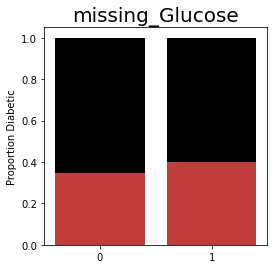

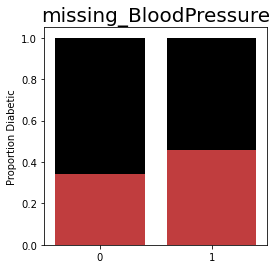

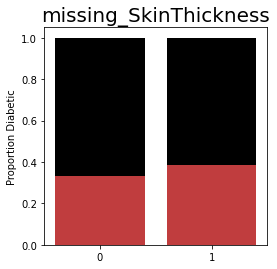

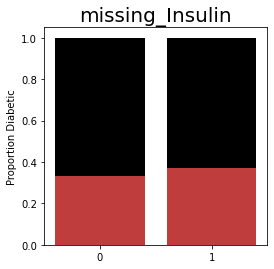

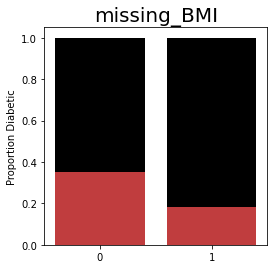

In [56]:

for i in miss_markers:
    plt.figure(figsize=(4,4))
    sns.barplot(props.index,props['Total'],color='black')
    sns.barplot(props.index,props[i],color='tab:red')
    plt.title(i,fontsize=20)
    plt.ylabel("Proportion Diabetic")
    plt.show() 

# Features Relationship with Outcome and each other

We will examine the features against outcome, excluding the missin gvalues identified earlier.

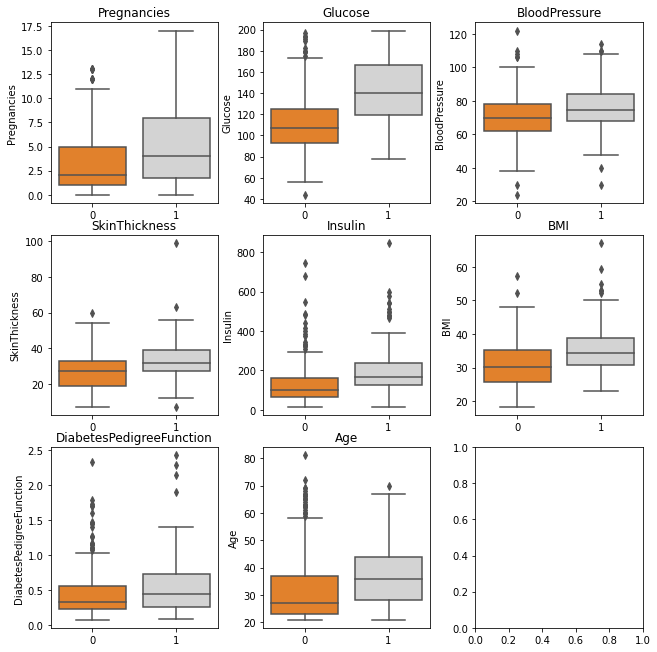

In [57]:
#Boxplots of features by diabetes status:
nrows=3
ncols=3
plt.subplots(nrows,ncols,figsize=(9,9))
plt.tight_layout()

j=1
for i in features:
    if i in ['Pregnancies','Age','DiabetesPedigreeFunction']:
        plt.subplot(nrows,ncols,j)
        sns.boxplot(data['Outcome'],data[i], palette={'lightgrey','tab:orange'})
        plt.xlabel("")
        plt.title(i)
        j+=1
    else:
        mini = data[data[i]!=0]
        plt.subplot(nrows,ncols,j)
        sns.boxplot(mini['Outcome'],mini[i], palette={'lightgrey','tab:orange'})
        plt.xlabel("")
        plt.title(i)
        j+=1

We can see that the diabetic group have higher glucose levels, Age, BMI, pregnancies and insulin measures

In [58]:
# Recoding missing values as nan:

miss_data = data.copy()

for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']:
    miss_data[i] = miss_data[i].replace(0,np.nan)
    
miss_data['SkinThickness'] = miss_data['SkinThickness'].replace(99,np.nan)

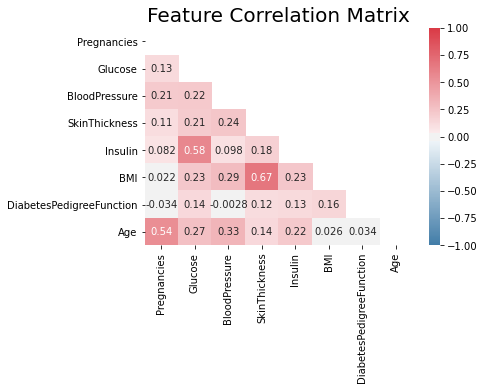

In [59]:
#Feature correlation excluding missing:

corr_mat = miss_data[features].corr()

mask = np.zeros_like(corr_mat,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_mat,annot=True,mask=mask,cmap=sns.diverging_palette(240,10,as_cmap=True),vmin=-1,vmax=1)
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()

We can see that a few of the features are moderately correlated - Age and number of pregnancies, Insulin and glucose levels, skin thickness and BMI - but not so much as to cause concern.

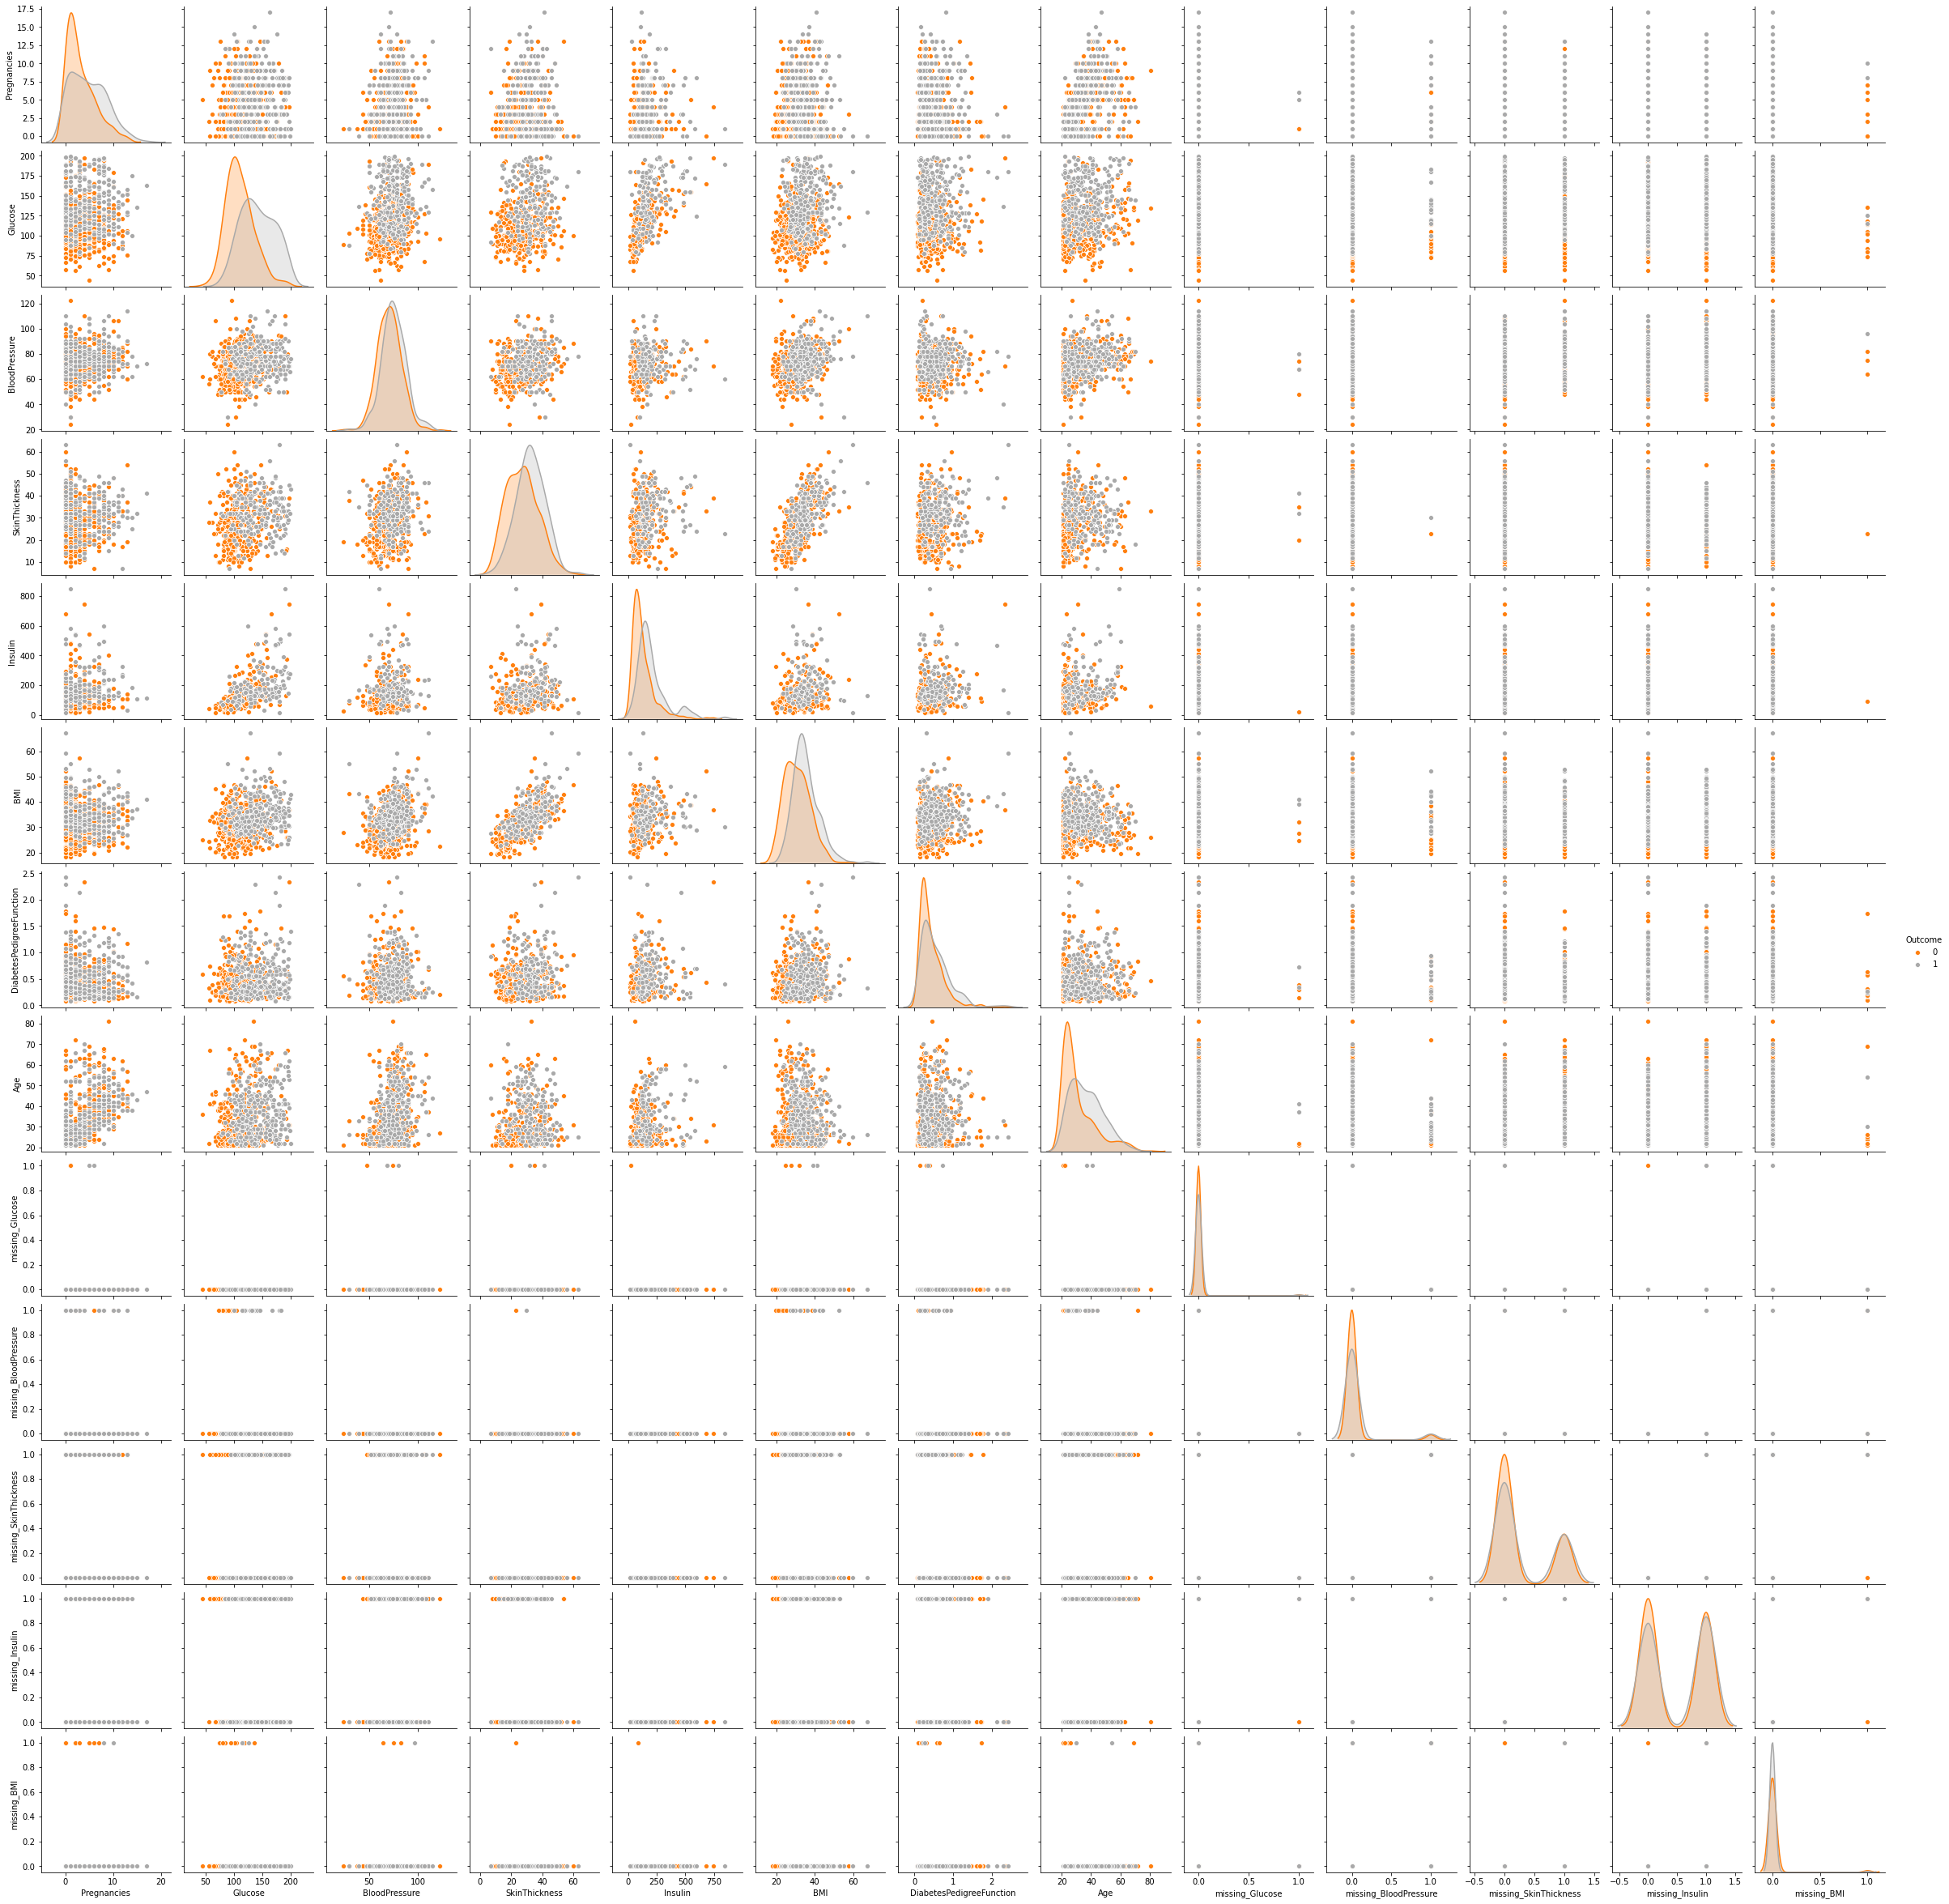

In [60]:
#Pairplots of features:
sns.pairplot(miss_data, hue='Outcome', palette={'darkgrey','tab:orange'})
plt.show()

# Feature Engineering
We will balance the diabetes classes. We will also impute missing values and scale the data using a pipeline.

# Upscale Diabetes Group
We saw earlier that our diabetes classes are not balanced so we will upscales the diabetes group.

In [61]:

df_min = miss_data[miss_data['Outcome']==1] 
df_maj = miss_data[miss_data['Outcome']==0]

df_min_upscaled = resample(df_min, replace=True,
                           n_samples=500,
                           random_state=0) 
miss_data = pd.concat([df_maj,df_min_upscaled]) 
miss_data.Outcome.value_counts()

0    500
1    500
Name: Outcome, dtype: int64

# Imputation and Scaling

We will replace the missing - previously zero - values with the variable medians as some of the distributions are skewed. We don't generally need to scale for logistic regression, but, by default, Python uses regularisation which requires scaling. We will also be fitting a KNN model which also requres scaling. We will create a modelling pipeline to do this.

# Feature Selection Using L1 Regularization¶
We will make an initial selection of the best features using L1 regularisation. We will further select features for the logistic regression model and Feature Importance for the Random Forest and XGBoost models.

In [62]:
y = miss_data['Outcome'].copy()
X = miss_data[features].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X",X.shape)
print("X_train",X_train.shape)
print("X_test",X_test.shape)

X (1000, 8)
X_train (800, 8)
X_test (200, 8)


In [63]:
#Create a modeling pipeline:
# Create num transformer for imputing and scaling then bundle into a preprocessor:

num_transformer = Pipeline( steps=[('imputer',SimpleImputer(strategy='median')),
                                        ('scaler',MinMaxScaler())
                                       ])


preprocessor = ColumnTransformer( transformers = [('num',num_transformer, features)
                                                 ])

In [64]:
#Define the L1 Logistic Regression model and
#bundle into a processing and modelling pipeline:

clf = LogisticRegression(penalty="l1",solver='liblinear',random_state=0)

pipe = Pipeline(steps = [('preprocessing',preprocessor),
                            ('modelling', clf)
                            ])

In [65]:
#Tune C with GridSearchCV:

hparams = {'modelling__C':[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100]}

grid = GridSearchCV(pipe,param_grid = hparams,cv=5,scoring='roc_auc',n_jobs=3,verbose=1)
grid.fit(X_train,y_train)
print("Best params",grid.best_params_)
print("Best score:",grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best params {'modelling__C': 3}
Best score: 0.8268641193936552


# Examine selected features

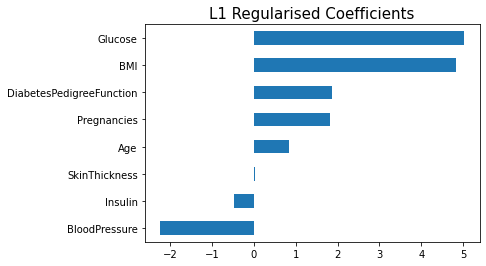

In [66]:
#Plot kept coefficients:
coefs = pd.Series(grid.best_estimator_.named_steps['modelling'].coef_[0],index = X.columns)
kept = coefs[coefs!=0]
kept.sort_values().plot.barh()

plt.title("L1 Regularised Coefficients", fontsize=15);

None of the features were dropped through L1 regularisation. Glucose and BMI are the features most strongly associated with diabetes status.

# Machine Learning

L2 Logistic Regression,
KNN,
SVCs,
Random Forest,
XGBoost

In [67]:
#Create table of results:
model_table = pd.DataFrame(columns=["Model","AUC"])


#Fit baseline models:
for i in [LogisticRegression(),KNeighborsClassifier(), SVC(kernel='linear'), SVC(kernel='rbf'),RandomForestClassifier(random_state=0),XGBClassifier(random_state=0)]:
    #define processing pipeline:
    num_transformer = Pipeline( steps=[('imputer',SimpleImputer(strategy='median')),
                                        ('scaler',MinMaxScaler())
                                       ])
    preprocessor = ColumnTransformer( transformers = [('num',num_transformer, features)
                                                 ])
    #Fit model:
    clf = i
    
    pipe = Pipeline(steps = [('preprocessing',preprocessor),
                            ('modelling', clf)
                            ])
    
    scores = cross_val_score(pipe,X_train,y_train,cv=5,scoring='roc_auc')
    
    
    #Add to model table:
    model_table = model_table.append({"Model":i,"AUC":scores.mean()},ignore_index=True)

round(model_table,3)

C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your lab

[22:25:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label 

,Model,AUC
0,LogisticRegression(),0.823
1,KNeighborsClassifier(),0.827
2,SVC(kernel='linear'),0.825
3,SVC(),0.845
4,RandomForestClassifier(random_state=0),0.925
5,"XGBClassifier(base_score=None, booster=None, c...",0.903


# Tuned Random Forest Model

In [33]:
#Tune RF model with GridSearchCV:
#Create pipeline:
num_transformer = Pipeline( steps=[('imputer',SimpleImputer(strategy='median')),
                                        ('scaler',MinMaxScaler())
                                       ])
preprocessor = ColumnTransformer( transformers = [('num',num_transformer, features)
                                                 ])
clf = RandomForestClassifier(random_state=0)   
    
pipe = Pipeline(steps = [('preprocessing',preprocessor),
                            ('modelling', clf)
                            ])

hparams = {'modelling__n_estimators':[n for n in range(100,501,100)],
          'modelling__max_depth':[4,6,8]}

grid = GridSearchCV(pipe,param_grid = hparams,cv=5,scoring='roc_auc',n_jobs=3,verbose=1)
grid.fit(X_train,y_train)
print("Best params",grid.best_params_)
print("Best score:",grid.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best params {'modelling__max_depth': 8, 'modelling__n_estimators': 100}
Best score: 0.9136509757383966


In [34]:
#Add Tuned RF model to table:
clf = RandomForestClassifier(n_estimators=100,max_depth=8, random_state=0)

pipe = Pipeline(steps = [('preprocessing',preprocessor),
                            ('modelling', clf)
                            ])
    
scores = cross_val_score(pipe,X_train,y_train,cv=5,scoring='roc_auc')
    
#Add to model table:
model_table = model_table.append({"Model":clf,"AUC":scores.mean()},ignore_index=True)
  

round(model_table,3)

,Model,AUC
0,LogisticRegression(),0.823
1,KNeighborsClassifier(),0.827
2,SVC(kernel='linear'),0.825
3,SVC(),0.845
4,RandomForestClassifier(random_state=0),0.925
5,"XGBClassifier(base_score=None, booster=None, c...",0.903
6,"RandomForestClassifier(max_depth=8, random_sta...",0.914


Our tuned Random Forest Classifier performed worse than our default RF classifier. This is likely to be because the default RF model has no max_depth, which can lead to overfitting.

# Tuned XGB Model

In [35]:
#Tune XGBoost model with GridSearchCV:
#Create pipeline:
num_transformer = Pipeline( steps=[('imputer',SimpleImputer(strategy='median')),
                                        ('scaler',MinMaxScaler())
                                       ])
preprocessor = ColumnTransformer( transformers = [('num',num_transformer, features)
                                                 ])
clf = XGBClassifier(random_state=0)   
    
pipe = Pipeline(steps = [('preprocessing',preprocessor),
                            ('modelling', clf)
                            ])

hparams = {'modelling__learning_rate':[0.001,0.003,0.01,0.03,0.1,0.3],
           'modelling__n_estimators':[n for n in range(100,501,100)],
          'modelling__max_depth':[4,6,8]}

grid = GridSearchCV(pipe,param_grid = hparams,cv=5,scoring='roc_auc',n_jobs=-1,verbose=3)
grid.fit(X_train,y_train)
print("Best params",grid.best_params_)
print("Best score:",grid.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params {'modelling__learning_rate': 0.03, 'modelling__max_depth': 6, 'modelling__n_estimators': 500}
Best score: 0.9069317471479919


In [36]:
#Fit the tuned XGBoost model:
clf = XGBClassifier(learning_rate=0.03,n_estimators=500,max_depth=6, random_state=0)

pipe = Pipeline(steps = [('preprocessing',preprocessor),
                            ('modelling', clf)
                            ])
    
scores = cross_val_score(pipe,X_train,y_train,cv=5,scoring='roc_auc')

#Add to table of results:
model_table = model_table.append({"Model":clf,"AUC":scores.mean()},ignore_index=True)
round(model_table,3)

[12:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your lab

[12:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,Model,AUC
0,LogisticRegression(),0.823
1,KNeighborsClassifier(),0.827
2,SVC(kernel='linear'),0.825
3,SVC(),0.845
4,RandomForestClassifier(random_state=0),0.925
5,"XGBClassifier(base_score=None, booster=None, c...",0.903
6,"RandomForestClassifier(max_depth=8, random_sta...",0.914
7,"XGBClassifier(base_score=None, booster=None, c...",0.907


Tuned Random Forest Model accuracy is the best so far.

# Tuned RF Model Feature Importances

Refit the tuned RF model to all the training data to obtain Feature Importances and predictions.

In [37]:
#Refit tuned RF model:
clf = RandomForestClassifier(n_estimators=100,max_depth=8, random_state=0)

pipe = Pipeline(steps = [('preprocessing',preprocessor),
                            ('modelling', clf)
                            ])

pipe.fit(X_train,y_train)
y_preds = pipe.predict(X_test)
y_probs = pipe.predict_proba(X_test)[:,1]

#Save tuned RF model Feature Importances:
tuned_feat_imps = pipe.named_steps['modelling'].feature_importances_

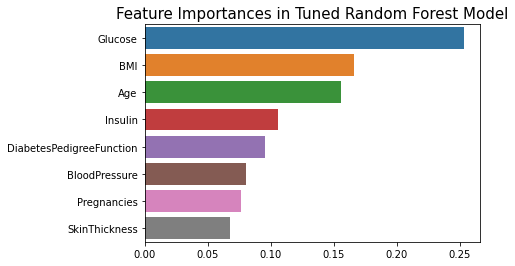

In [38]:
#Plot Tuned Random Forest Feature Importances:

feat_imp = pd.Series(tuned_feat_imps,index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False)
sns.barplot(feat_imp,feat_imp.index)
plt.title("Feature Importances in Tuned Random Forest Model",fontsize=15);

In the tuned Random Forest model Glucose is the most important feature while SkinThickness is the least important feature.

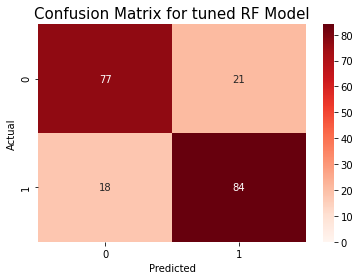

In [44]:
#Confusion matrix for tuned RF model:
con_mat = pd.crosstab(y_test,y_preds,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(con_mat,annot=True,cmap='Reds',vmin=0)
plt.title("Confusion Matrix for tuned RF Model", fontsize=15)
plt.show()

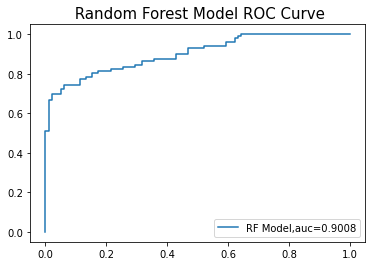

In [45]:
#ROC curve:
fpr,tpr,_ = roc_curve(y_test,y_probs)
auc = roc_auc_score(y_test,y_probs)
plt.plot(fpr,tpr,label="RF Model,auc=" +  str(round(auc,4)))
plt.title(" Random Forest Model ROC Curve",fontsize=15)
plt.legend(loc=4);

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        98
           1       0.80      0.82      0.81       102

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



# 4.Summary

The Random Forest Classifier model is a good predictor of diabetes in Pima Indian women aged over 21, AUC score = 90.1%, sensitivity = 82.0%. The most important feature for prediction is Glucose.

NOTE: Almost half the subjects had missing insulin values, 48.7%, and almost a third have missing skin thickness measurements, 29.6%.